# Example Jupyter notebook -  Lorenz attractor
Here we show the basic functionality of a notebook.

The **Lorenz system** is a system of ordinary differential equations first studied by Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system which, when plotted, resemble a butterfly or figure eight.

<img src="lorenz.gif">

For more information see  
https://en.wikipedia.org/wiki/Lorenz_system

This notebook is available online at  
https://github.com/matthiaskoenig/itbtechtalks/blob/gh-pages/talks/03_jupyter/lorenz.ipynb

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from IPython.display import display

## Definition of the lorenz system
The Lorenz system consists of three coupled differential equations

$$
\frac{dx}{dt} = \sigma (y-x)\\
\frac{dy}{dz} = x (r - z) - y\\
\frac{dz}{dt} = xy - b z\\
$$
From a technical standpoint, the Lorenz system is nonlinear, non-periodic, three-dimensional and deterministic.

* $\sigma$ is called the  Prandtl Number: the ratio of momentum diffusivity (Kinematic viscosity) and thermal diffusivity. 
* $r$ is called the Rayleigh Number: determine whether the heat transfer is primarily in the form of conduction or convection.
* $b$ is a geometric factor.

In [2]:
def lorenz_dxdt(x, t, r=45.92, b=4.0, sigma=16.0):
    """ Differential equations for Lorenz.

    :param x: state vector
    :param t: time
    :return: ODE system
    """
    return [
        sigma*(x[1] - x[0]),
        x[0]*(r-x[2]) - x[1],
        x[0]*x[1] - b*x[2],
    ]

## Plotting helpers
In this section we define a plotting function which takes the simulation results of the lorenz system and plots the results.

We are creating
* time course plots
* phase plots

In [3]:
def lorenz_plot(s):
    """ Plot the Lorenz attractor.

    :param s: Data Frame with results
    :return:
    """
    # plot results
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes = (ax1, ax2, ax3, ax4)
    ax1.plot(s.time, s.x, label="x")
    ax1.plot(s.time, s.y, label="y")
    ax1.plot(s.time, s.z, label="z")

    ax2.plot(s.x, s.y, label="y ~ x")
    ax3.plot(s.x, s.z, label="z ~ x")
    ax4.plot(s.y, s.z, label="z ~ y")

    ax1.set_title("Lorenz Time Course")
    ax1.set_xlabel("time")
    for ax in (ax2, ax3, ax4):
        ax.set_title("Lorenz State Space")
        ax.set_xlabel("value")

    for ax in axes:
        ax.legend()
        ax.set_ylabel("value")

    plt.show()

    return fig

## Simulation
Now we integrate the Lorenz system and plot the results with a given set of parameters.

The important role of parameter $r$ in the chaotic behavior of the Lorenz Equations.
For instance: Fix $sigma=10$, $b=8/3$
* $0 < r < 1$  
the origin is globally stable
* $r>1$  
the origin is non-stable
* $1 < r < 24.74$  
two stable solutions
* $r > 24.74$  
unstable, Lorenz attractor

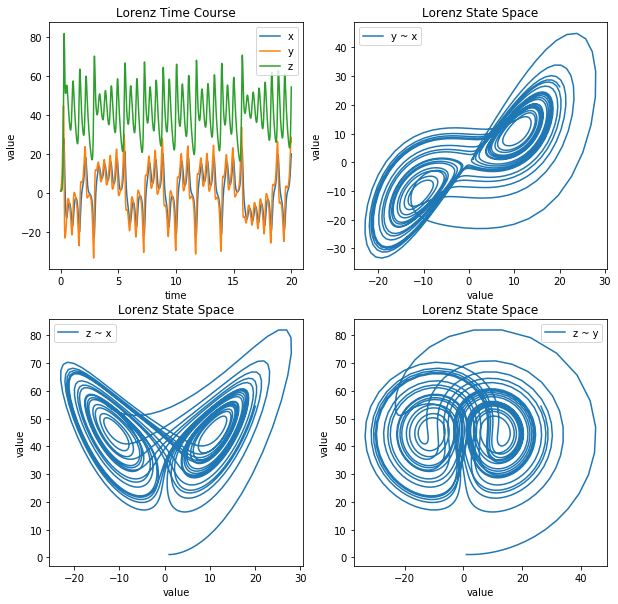

In [4]:
# simulate
time = np.arange(0, 20, 0.01)
# x0 = [1, 1, 1]
# pars = (45.92, 4.0, 16.0)

xids = ['x', 'y', 'z']
x0 = [1, 1, 1]

# (r, b, sigma)
b = 8.0/3.0
sigma = 10.0
r = 45.92 # 45.92
pars = (r, b, sigma)

X = odeint(lorenz_dxdt, x0, time, pars)

# create data frame
s = pd.DataFrame(X, columns=xids)
s['time'] = time
s = s[['time']+xids]

# plot attractor
lorenz_plot(s);

We can have a look at the solution by showing the data frame

In [5]:
display(s.head(10))

,time,x,y,z
0,0.00,1.000000,1.000000,1.000000
1,0.01,1.021256,1.440286,0.985825
2,0.02,1.082942,1.894962,0.977159
3,0.03,1.183430,2.381472,0.975308
4,0.04,1.322878,2.916740,0.982341
5,0.05,1.503042,3.517884,1.001272
6,0.06,1.727175,4.202856,1.036349
7,0.07,1.999994,4.990996,1.093483
8,0.08,2.327692,5.903524,1.180846
9,0.09,2.718002,6.963961,1.309709


## Interactive plots
In the following we create interactive plots with plotly

In [6]:
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


# Create traces
trace0 = go.Scatter(
    x = s.time,
    y = s.x,
    mode = 'lines',
    name = 'x'
)
trace1 = go.Scatter(
    x = s.time,
    y = s.y,
    mode = 'lines',
    name = 'y'
)
trace2 = go.Scatter(
    x = s.time,
    y = s.z,
    mode = 'lines',
    name = 'z'
)
data = [trace0, trace1, trace2]

py.iplot(data, filename='line-mode')